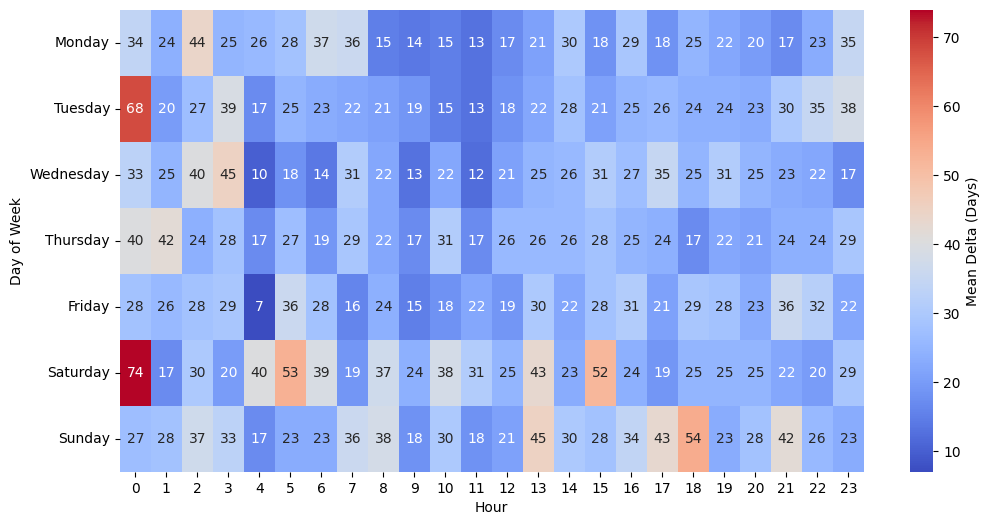

In [2]:
!pip install pandas
!pip install seaborn
!pip install matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


SECONDS_IN_A_DAY = 3600 * 24
df = pd.read_csv("project-8400-GitHub-20240509T181710.csv")


df["created_at"] = pd.to_datetime(df["created_at"])
df["closed_at"] = pd.to_datetime(df["closed_at"])

df["delta_days"] = (
    (df["closed_at"] - df["created_at"]).dt.total_seconds() / SECONDS_IN_A_DAY
)

df["Hour"] = df["created_at"].dt.hour
df["Day of Week"] = df["created_at"].dt.day_name()
day_order = [
    'Monday', 'Tuesday', 'Wednesday',
    'Thursday', 'Friday', 'Saturday', 'Sunday'
]
df["Day of Week"] = pd.Categorical(
    df["Day of Week"], categories=day_order, ordered=True
)

mean = df.groupby(["Day of Week", "Hour"], observed=True).agg(
    {"delta_days": "mean"}).unstack()
mean["delta_days"] = mean["delta_days"].round().astype(int)

plt.figure(figsize=(12, 6))

sns.heatmap(
    mean["delta_days"],
    annot=True,
    fmt="d",
    cmap="coolwarm",
    cbar_kws={'label': 'Mean Delta (Days)'}
)

plt.show()
